In [1]:
# Step 1: Importing required libraries

import pandas as pd

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

In [2]:
# Step 2: Reading Dataset
salary_data=pd.read_csv("datasets/Salary.csv")

In [3]:
salary_data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [4]:
salary_data.shape

(35, 2)

In [5]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [7]:
# Step 3: Label Split

x = salary_data[['YearsExperience']]

y = salary_data['Salary']

In [8]:
x.shape

(35, 1)

In [9]:
x.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [10]:
# Step 4: Train test split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [11]:
x_train.head()

,YearsExperience
19,6.0
12,4.0
1,1.3
16,5.1
30,11.2


In [12]:
x_train.shape

(28, 1)

In [13]:
x_test.shape

(7, 1)

In [14]:
x_train.head()

,YearsExperience
19,6.0
12,4.0
1,1.3
16,5.1
30,11.2


In [15]:
x_test.head()

,YearsExperience
13,4.1
14,4.5
26,9.5
9,3.7
28,10.3


In [16]:
y_train.shape

(28,)

In [17]:
y_train.head()

19     93940
12     56957
1      46205
16     66029
30    127345
Name: Salary, dtype: int64

In [18]:
y_test.shape

(7,)

In [19]:
y_test.head()

13     57081
14     61111
26    116969
9      57189
28    122391
Name: Salary, dtype: int64

In [19]:
# Step 5: Ensure X_train and X_test are DataFrames and if not then we convert them from 1D series to 2D dataframe
if isinstance(x_train, pd.Series):
   x_train = x_train.to_frame()
   
if isinstance(x_test, pd.Series):
   x_test = x_test.to_frame()


In [20]:
x_train.shape

(28, 1)

In [21]:
x_train

,YearsExperience
19,6.0
12,4.0
1,1.3
16,5.1
30,11.2
25,9.0
24,8.7
10,3.9
4,2.2
6,3.0


In [22]:
# Step 6: Loading model and creating its instance
linear_regression_model=LinearRegression()

In [23]:
# Step 7: Loading model instance and training it on out training data
trained_linear_regression=linear_regression_model.fit(x_train, y_train)

In [24]:
# Step 8: Testing the trained model
y_predict=trained_linear_regression.predict(x_test)

In [25]:
print(y_test.shape, y_predict.shape)

(7,) (7,)


In [26]:
y_predict

array([ 65377.76384262,  68846.65384201, 112207.77883428,  61908.87384324,
       119145.55883305, 136490.00882996,  39361.08884726])

In [27]:
y_test

13     57081
14     61111
26    116969
9      57189
28    122391
32    128765
0      39343
Name: Salary, dtype: int64

In [27]:
# Step 9: Evaluate the model performance using appropriate metrics
mse = mean_squared_error(y_test, y_predict)
"""
    Calculates the mean squared error between true and predicted values.
    
    MSE = (1/n) * Σ(y_true - y_pred)^2
    
    where:
    - Σ is the sum operator
    - n is the number of samples
    - y_true are the true target values
    - y_pred are the predicted values
    
    MSE is a risk function that measures the average squared difference between the estimated values and the actual value. It incorporates both the variance of the estimator and its bias. For an unbiased estimator, the MSE is the variance of the estimator.
    
    A lower MSE indicates better model performance, with a perfect model having an MSE of 0.
"""

mae = mean_absolute_error(y_test, y_predict)
"""
    Calculates the mean absolute error between true and predicted values.
    
    MAE = (1/n) * Σ|y_true - y_pred|
    
    where:
    - Σ is the sum operator
    - n is the number of samples
    - y_true are the true target values
    - y_pred are the predicted values
    
    MAE measures the average absolute difference between the true and predicted values. It is less sensitive to outliers compared to MSE since it does not square the differences.
    
    A lower MAE indicates better model performance, with a perfect model having an MAE of 0.
"""

r2 = r2_score(y_test, y_predict)
"""
    Calculates the coefficient of determination (R-squared) between true and predicted values.
    
    R² = 1 - (Σ(y_true - y_pred)^2 / Σ(y_true - y_mean)^2)
    
    where:
    - Σ is the sum operator
    - y_true are the true target values
    - y_pred are the predicted values
    - y_mean is the mean of the true values
    
    R-squared represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s). It provides an indication of goodness of fit, with R² = 1 indicating that the regression line perfectly fits the data.
    
    R-squared values range from 0 to 1, with higher values indicating better model performance.
"""

rmse = np.sqrt(mean_squared_error(y_test, y_predict))
"""
    Calculate the Root Mean Squared Error (RMSE).

    RMSE is a measure of the differences between predicted and actual values.
    It is the square root of the average of squared differences.

    Formula:
        RMSE = sqrt((1/n) * Σ(y_true - y_pred)^2)

    Parameters:
        y_true (array-like): Actual values.
        y_pred (array-like): Predicted values.

    Returns:
        float: The RMSE value.

    Interpretation:
        Lower RMSE values indicate better model performance, as they represent
        smaller discrepancies between predicted and actual values.
"""


'\n    Calculate the Root Mean Squared Error (RMSE).\n\n    RMSE is a measure of the differences between predicted and actual values.\n    It is the square root of the average of squared differences.\n\n    Formula:\n        RMSE = sqrt((1/n) * Σ(y_true - y_pred)^2)\n\n    Parameters:\n        y_true (array-like): Actual values.\n        y_pred (array-like): Predicted values.\n\n    Returns:\n        float: The RMSE value.\n\n    Interpretation:\n        Lower RMSE values indicate better model performance, as they represent\n        smaller discrepancies between predicted and actual values.\n'

In [28]:
print(" Mean Squared Error is: ", mse)

print(" Mean abasolute Error is: ", mae)

print(" r2 Score is: ", r2)

print( " Root Mean Squared Error is: ", rmse)

 Mean Squared Error is:  34833149.100864425
 Mean abasolute Error is:  5214.578791107869
 r2 Score is:  0.9713897949584879
 Root Mean Squared Error is:  5901.961462163611


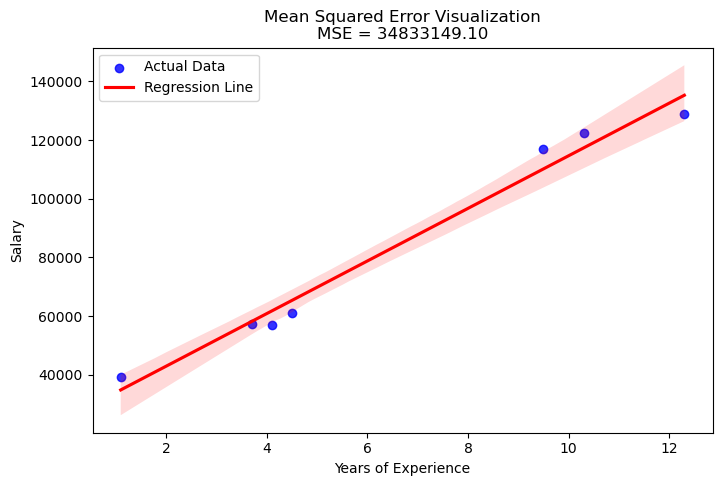

In [29]:
# Visualize MSE using Seaborn regplot
plt.figure(figsize=(8, 5))
sns.regplot(x=x_test['YearsExperience'], y=y_test, scatter=True, color='blue', line_kws={'color': 'red'})
plt.title(f'Mean Squared Error Visualization\nMSE = {mse:.2f}')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['Actual Data', 'Regression Line'])
plt.show()

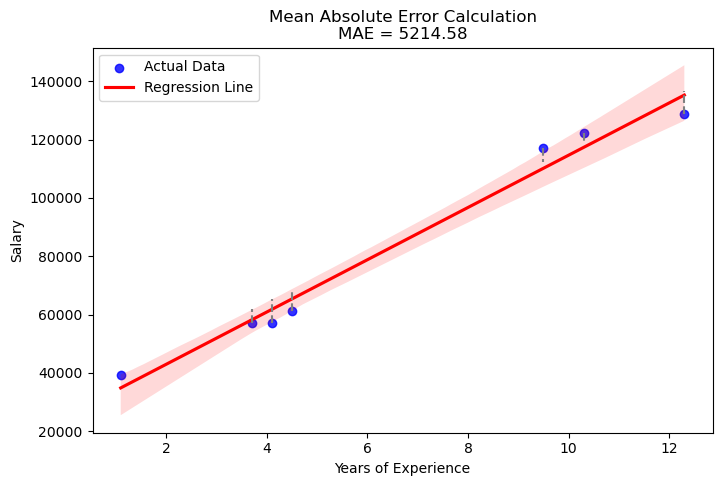

In [30]:
# Visualise Mean Absolute Error using Seaborn regplot
plt.figure(figsize=(8, 5))
sns.regplot(x=x_test['YearsExperience'], y=y_test, scatter=True, color='blue', line_kws={'color': 'red'})
for i in range(len(y_test)):
    plt.plot([x_test.iloc[i]['YearsExperience'], x_test.iloc[i]['YearsExperience']], [y_test.iloc[i], y_predict[i]], color='grey', linestyle='--')
plt.title(f'Mean Absolute Error Calculation\nMAE = {mae:.2f}')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['Actual Data', 'Regression Line'])
plt.show()

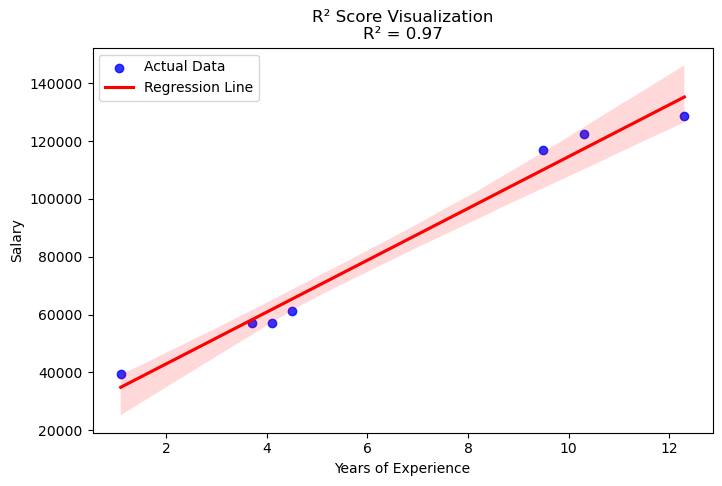

In [31]:
# Visualize R² Score using Seaborn regplot
plt.figure(figsize=(8, 5))
sns.regplot(x=x_test['YearsExperience'], y=y_test, scatter=True, color='blue', line_kws={'color': 'red'})
plt.title(f'R² Score Visualization\nR² = {r2:.2f}')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['Actual Data', 'Regression Line'])
plt.show()

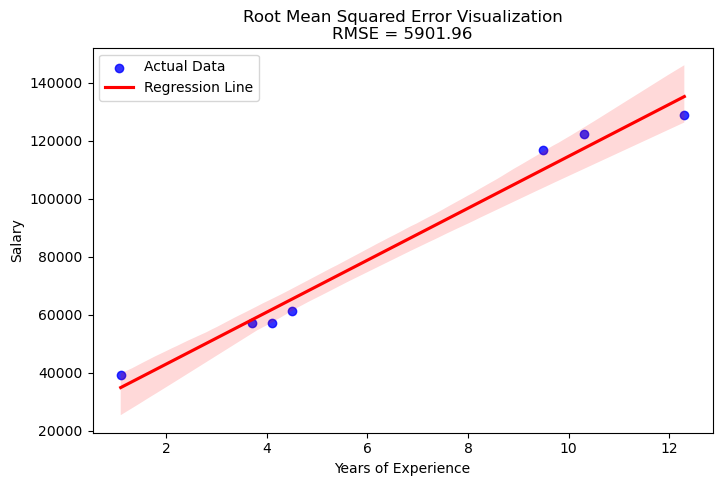

In [32]:
# Visualise Root Mean Squared Error using seaborn regplot
plt.figure(figsize=(8, 5))
sns.regplot(x=x_test['YearsExperience'], y=y_test, scatter=True, color='blue', line_kws={'color': 'red'})
plt.title(f'Root Mean Squared Error Visualization\nRMSE = {rmse:.2f}')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['Actual Data', 'Regression Line'])
plt.show()

In [33]:
# Calculate accuracy and it is same as r2 sore
accuracy = linear_regression_model.score(x_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.97


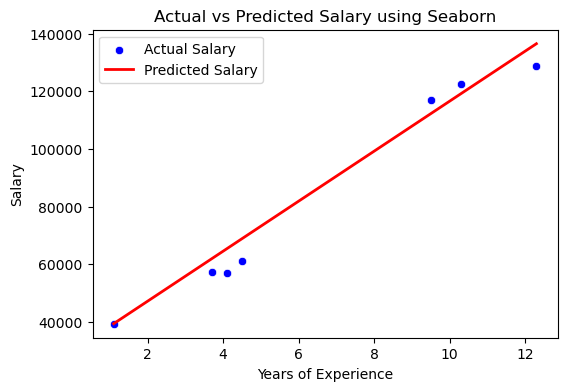

In [34]:
# Step 10: Visualize the results using Seaborn
plt.figure(figsize=(6, 4))
sns.scatterplot(x=x_test['YearsExperience'], y=y_test, color='blue', label='Actual Salary')
sns.lineplot(x=x_test['YearsExperience'], y=y_predict, color='red', label='Predicted Salary', linewidth=2)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Actual vs Predicted Salary using Seaborn')
plt.legend()
plt.show()

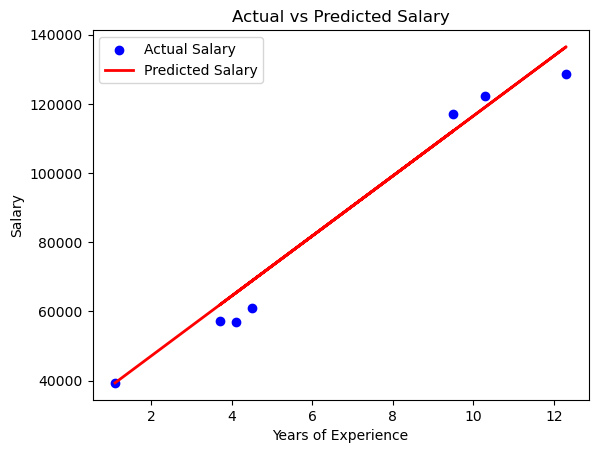

In [35]:
# Alternate Plotting via Matplotlib.library
# Step 10: Visualize the results
plt.scatter(x_test, y_test, color='blue', label='Actual Salary')
plt.plot(x_test, y_predict, color='red', linewidth=2, label='Predicted Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Actual vs Predicted Salary')
plt.legend()
plt.show()

In [42]:
def predict_salary(years):
    # Reshape input for prediction (needs to be a 2D array)
    #years_reshaped = np.array([[years]])
    years_reshaped = pd.DataFrame({'YearsExperience':[years]})
    years_reshaped = years_reshaped['YearsExperience'].to_frame()
    predicted_salary = linear_regression_model.predict(years_reshaped)
    return np.round(predicted_salary[0])
    #return predicted_salary[0]

# Example usage:
custom_years = float(input("Enter years of experience to predict salary: "))
predicted_salary = predict_salary(custom_years)
print(f'Predicted Salary for {custom_years} years of experience: ₹{predicted_salary:.2f}')
print(predicted_salary)

Enter years of experience to predict salary:  7.3


Predicted Salary for 7.3 years of experience: ₹93129.00
93129.0
